In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
df = pd.read_csv('Music Sales.csv', parse_dates=['InvoiceDate'],index_col=None)

In [3]:
df.columns

Index(['Album', 'Artist', 'Bytes', 'Sales', 'City', 'Company', 'Composer',
       'Country', 'CustomerID', 'Email', 'FirstName', 'Genre', 'InvoiceDate',
       'InvoiceID', 'LastName', 'MediaType', 'Milliseconds',
       'Number of Records', 'Phone', 'PostalCode', 'Quantity', 'Region',
       'State', 'Track', 'UnitPrice'],
      dtype='object')

In [4]:
music=df[['Country','Sales','InvoiceDate']]
music_na=music[(music.Country=='USA')|(music.Country=='Canada')]
music_na.head()

,Country,Sales,InvoiceDate
12,Canada,0.99,2008-01-06
13,Canada,1.98,2008-01-06
14,Canada,2.97,2008-01-06
15,Canada,2.97,2008-01-06
16,Canada,2.97,2008-01-06


In [5]:
music_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766 entries, 12 to 2118
Data columns (total 3 columns):
Country        766 non-null object
Sales          766 non-null float64
InvoiceDate    766 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 23.9+ KB


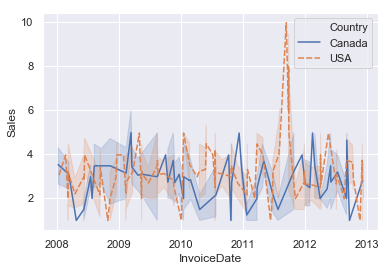

In [6]:
sns.set(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="InvoiceDate", y="Sales",
             hue="Country", style='Country',
             data=music_na)

Question 2
Explore how Rock music monthly market share fluctuates in US, 2011-2012.

Clarification: I would define "market share" as the Sales of Rocks / Total Sales across all genres in each month. 

In [7]:
df2=df[(df.Country=='USA')&(df.InvoiceDate > '2010-12-31')&(df.InvoiceDate<'2013-01-01')][['Country','InvoiceDate','Genre','Sales']]
df2.head()

,Country,InvoiceDate,Genre,Sales
1305,USA,2011-01-24,Rock,0.99
1306,USA,2011-01-24,Rock,0.99
1307,USA,2011-01-24,Metal,1.98
1308,USA,2011-01-24,Rock,1.98
1309,USA,2011-01-24,Metal,2.97


In [8]:
df2= df2.fillna(df2.bfill())

In [9]:
import calendar
import datetime
df2['EndofMonth'] = df2['InvoiceDate'].map(
    lambda x: datetime.datetime(
        x.year,
        x.month,
        max(calendar.monthcalendar(x.year, x.month)[-1][:5])
    )
)

In [10]:
df2.head()

,Country,InvoiceDate,Genre,Sales,EndofMonth
1305,USA,2011-01-24,Rock,0.99,2011-01-31
1306,USA,2011-01-24,Rock,0.99,2011-01-31
1307,USA,2011-01-24,Metal,1.98,2011-01-31
1308,USA,2011-01-24,Rock,1.98,2011-01-31
1309,USA,2011-01-24,Metal,2.97,2011-01-31


In [13]:
df3=df2.groupby('EndofMonth')['Sales'].sum().to_frame('MonthlySum').reset_index()
df3.head()

,EndofMonth,MonthlySum
0,2011-01-31,32.67
1,2011-03-31,10.89
2,2011-04-29,35.64
3,2011-06-30,22.77
4,2011-07-29,15.87


In [18]:
df4=pd.merge(df3,df2,left_on=['EndofMonth'],right_on=['EndofMonth'],how='right')
df4.head()

,EndofMonth,MonthlySum,Country,InvoiceDate,Genre,Sales
0,2011-01-31,32.67,USA,2011-01-24,Rock,0.99
1,2011-01-31,32.67,USA,2011-01-24,Rock,0.99
2,2011-01-31,32.67,USA,2011-01-24,Metal,1.98
3,2011-01-31,32.67,USA,2011-01-24,Rock,1.98
4,2011-01-31,32.67,USA,2011-01-24,Metal,2.97


In [22]:
df5=df4[(df4.Genre=='Rock')]
df5.head()

,EndofMonth,MonthlySum,Country,InvoiceDate,Genre,Sales
0,2011-01-31,32.67,USA,2011-01-24,Rock,0.99
1,2011-01-31,32.67,USA,2011-01-24,Rock,0.99
3,2011-01-31,32.67,USA,2011-01-24,Rock,1.98
7,2011-01-31,32.67,USA,2011-01-27,Rock,1.98
11,2011-01-31,32.67,USA,2011-01-27,Rock,4.95


In [24]:
df6=df5.groupby('EndofMonth')['Sales'].sum().to_frame('RockMonthlySum').reset_index()
df6.head()

,EndofMonth,RockMonthlySum
0,2011-01-31,10.89
1,2011-04-29,14.85
2,2011-06-30,18.81
3,2011-08-31,12.87
4,2011-11-30,13.86


In [25]:
df7=pd.merge(df6,df5,left_on=['EndofMonth'],right_on=['EndofMonth'],how='right')
df7.head()

,EndofMonth,RockMonthlySum,MonthlySum,Country,InvoiceDate,Genre,Sales
0,2011-01-31,10.89,32.67,USA,2011-01-24,Rock,0.99
1,2011-01-31,10.89,32.67,USA,2011-01-24,Rock,0.99
2,2011-01-31,10.89,32.67,USA,2011-01-24,Rock,1.98
3,2011-01-31,10.89,32.67,USA,2011-01-27,Rock,1.98
4,2011-01-31,10.89,32.67,USA,2011-01-27,Rock,4.95


In [31]:
df7['Rock_mkt_share']=df7['RockMonthlySum']/df7['MonthlySum']
df8=df7[['EndofMonth','Rock_mkt_share']]
df8.drop_duplicates()

,EndofMonth,Rock_mkt_share
0,2011-01-31,0.333333
5,2011-04-29,0.416667
8,2011-06-30,0.826087
15,2011-08-31,0.244352
19,2011-11-30,0.500000
24,2011-12-30,0.300000
28,2012-02-29,0.648649
38,2012-04-30,0.189655
42,2012-09-28,0.133333
43,2012-10-31,0.540541


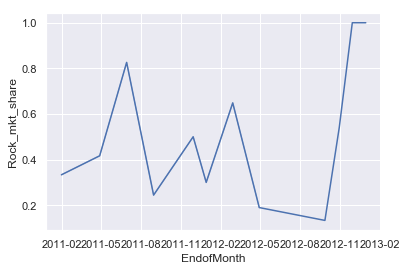

In [36]:
sns.set(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="EndofMonth", y="Rock_mkt_share",data=df8)

From the above chart, we can tell that the rock market has increased a lot towards end of 2012. 